**Computer Vision**
Task 4:
Download the dataset from https://drive.google.com/file/d/1ndCMh6mJ5LiO805cc3Q77K4p6hz7yEsV/view?usp=sharing The above link contains folder containing two images. Perform all the following tasks on both of the images. After performing each task display the image in the python notebook.

1.Image Loading:

Load an image from your local system using OpenCV.
Color Space Conversion:
Convert the image to grayscale and display it.

Convert the grayscale image to a different color space (e.g., HSV) and display it.
2.Image Filtering:

Apply Gaussian Blur to the original color image and display the result.
Apply a custom kernel for image smoothing (e.g., averaging) and display the result.
3.Edge Detection:

Apply Canny edge detection to the grayscale image and display the edges.
Contours:

Find and draw contours on the original image based on the edges obtained from Canny.
4.Histogram:

Compute and display the histogram of the grayscale image.
5.Object Detection:

Load a pre-trained object detection model and apply it to detect cars in the image. (In case of humans detect faces else detect the object present in the image)
6.Save Results:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display image using matplotlib
def display_image(title, image, cmap=None):
    plt.figure(figsize=(10, 10))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# 1. Image Loading
image1_path = '/content/cars.jpg'  # Replace with the actual path to the image
image2_path = '/content/humans.jpg'  # Replace with the actual path to the image

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)


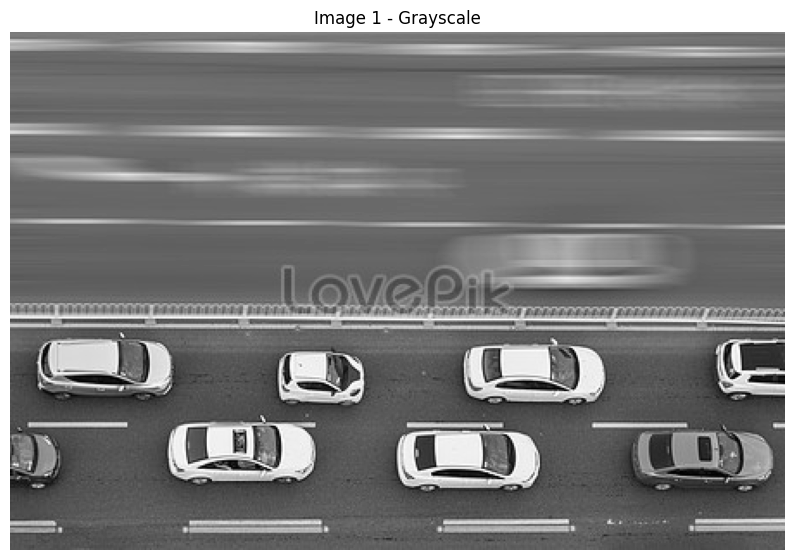

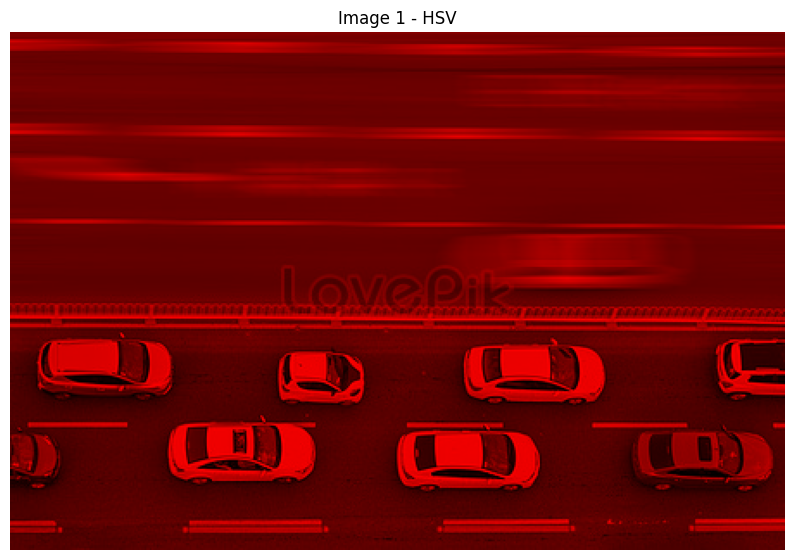

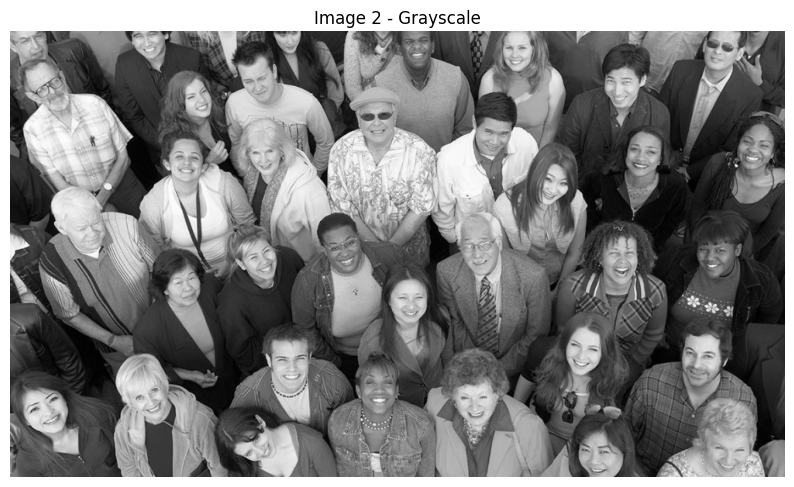

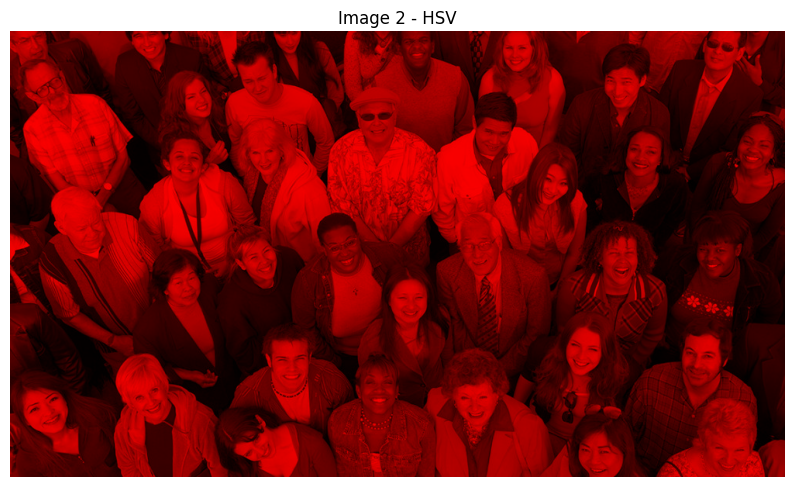

In [ ]:
# 2. Color Space Conversion
def convert_and_display(image, image_title):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image(f'{image_title} - Grayscale', gray_image, cmap='gray')

    # Convert grayscale to HSV
    hsv_image = cv2.cvtColor(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), cv2.COLOR_BGR2HSV)
    display_image(f'{image_title} - HSV', hsv_image)

convert_and_display(image1, "Image 1")
convert_and_display(image2, "Image 2")

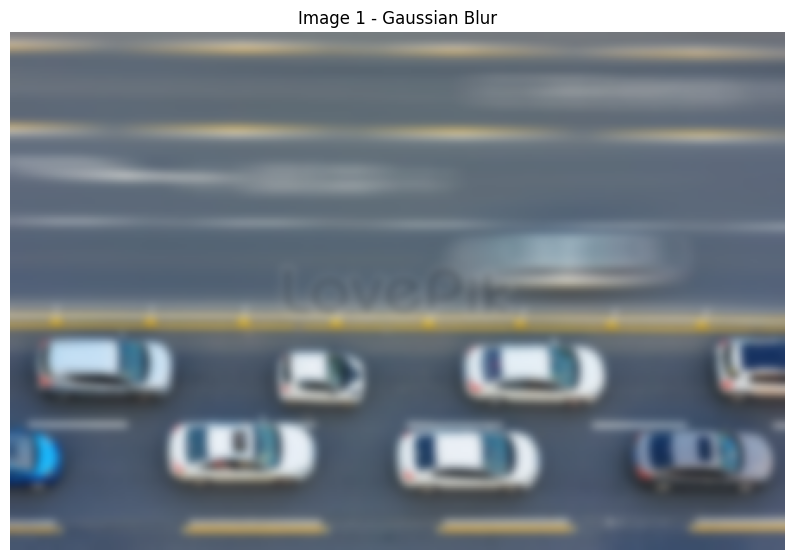

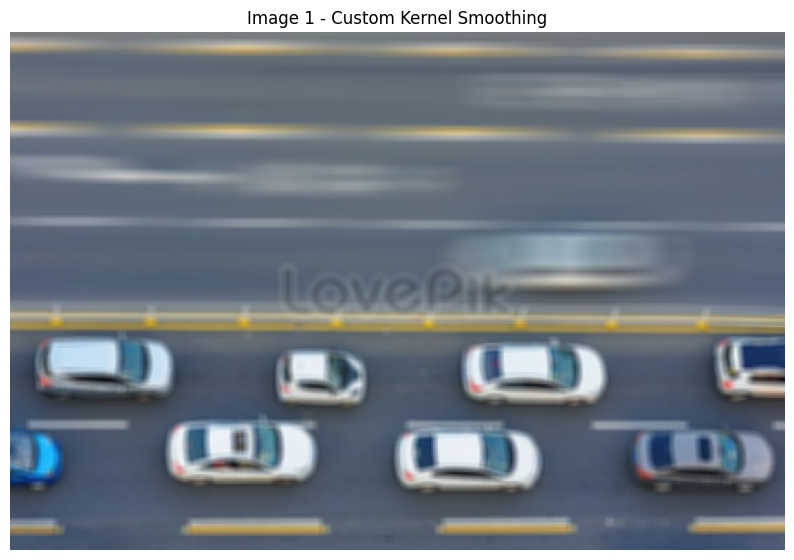

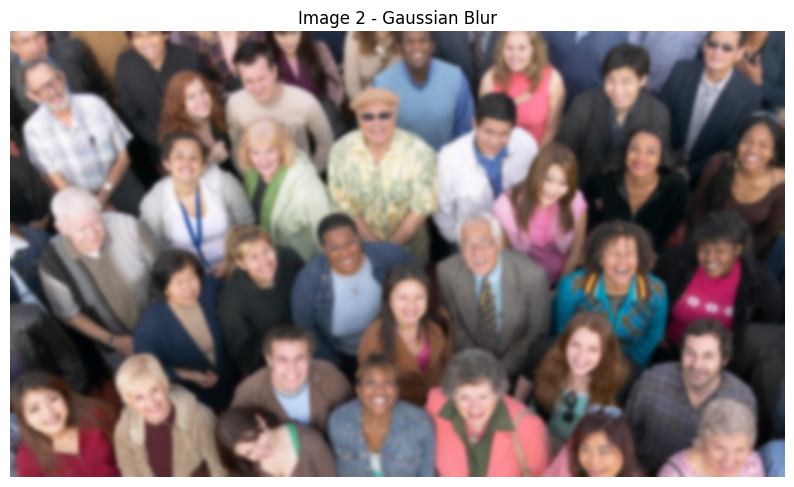

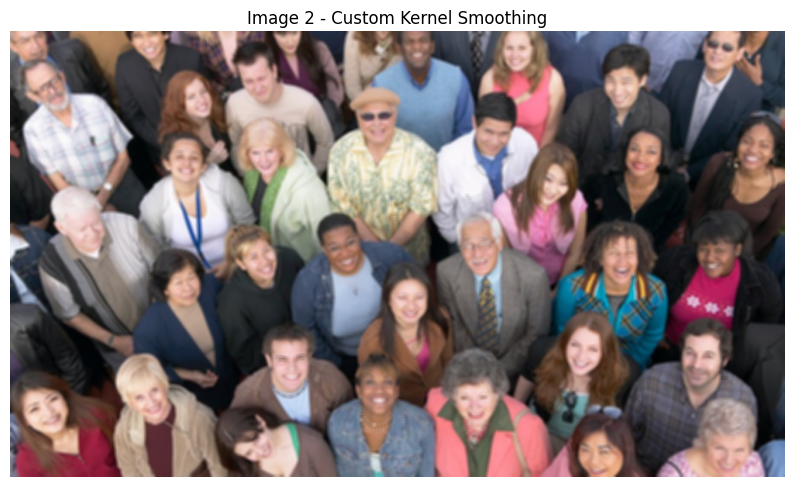

In [ ]:
# 3. Image Filtering
def filter_and_display(image, image_title):
    # Apply Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(image, (15, 15), 0)
    display_image(f'{image_title} - Gaussian Blur', gaussian_blur)

    # Apply custom kernel for smoothing (Averaging)
    kernel = np.ones((5, 5), np.float32) / 25
    smooth_image = cv2.filter2D(image, -1, kernel)
    display_image(f'{image_title} - Custom Kernel Smoothing', smooth_image)

filter_and_display(image1, "Image 1")
filter_and_display(image2, "Image 2")

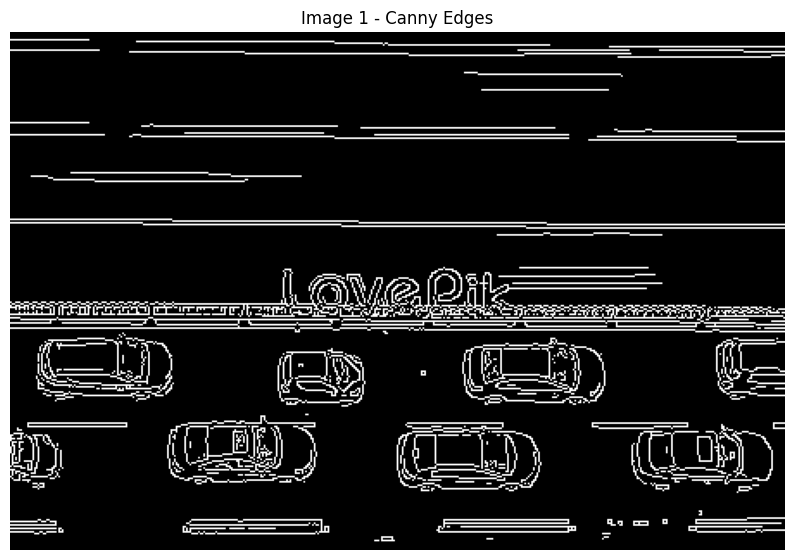

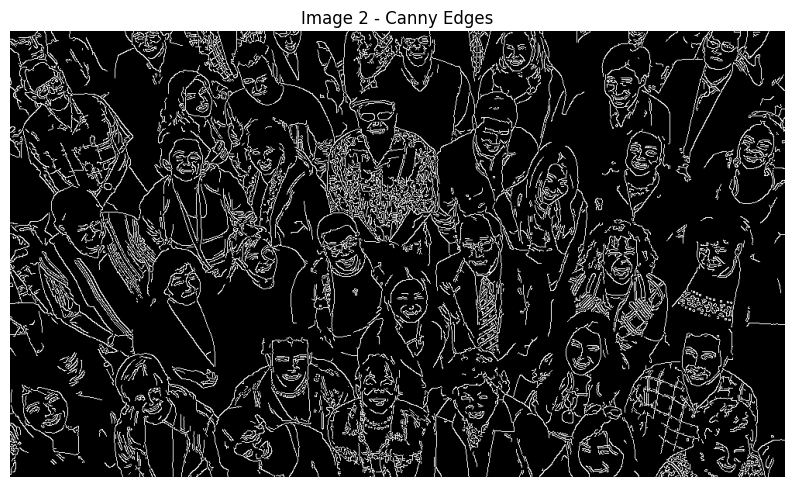

In [ ]:
# 4. Edge Detection
def edge_detection(image, image_title):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    display_image(f'{image_title} - Canny Edges', edges, cmap='gray')

edge_detection(image1, "Image 1")
edge_detection(image2, "Image 2")

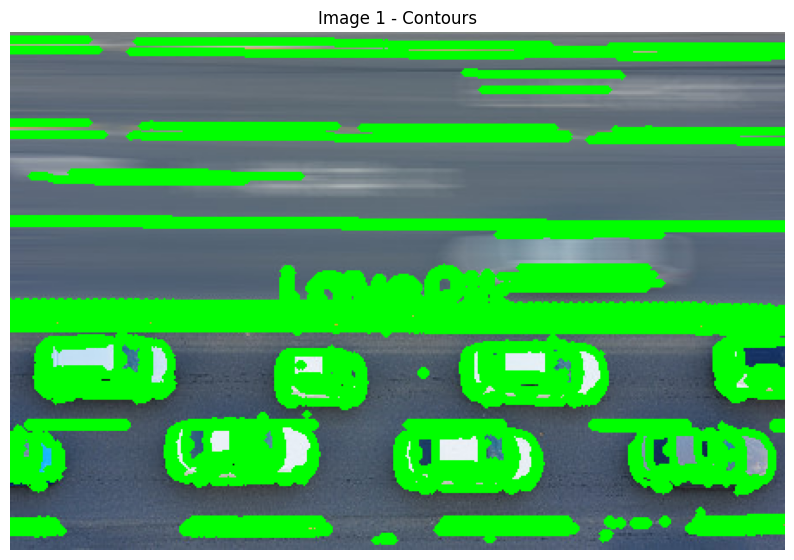

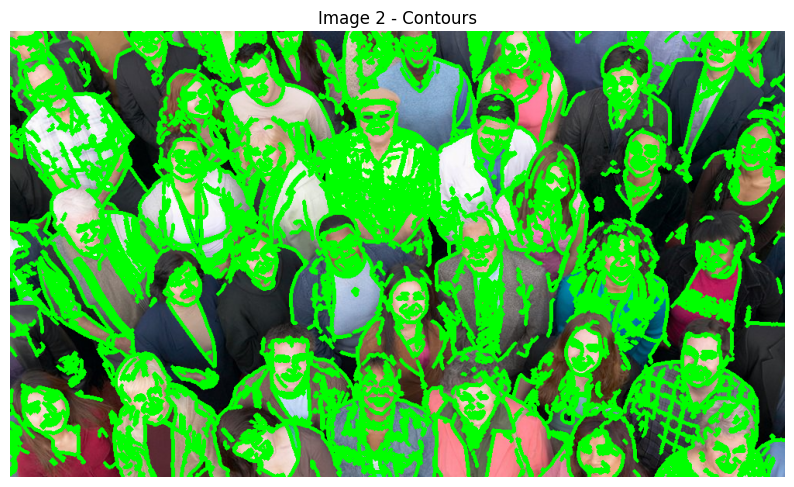

In [ ]:
# 5. Contours
def find_and_draw_contours(image, image_title):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)
    display_image(f'{image_title} - Contours', contour_image)

find_and_draw_contours(image1, "Image 1")
find_and_draw_contours(image2, "Image 2")


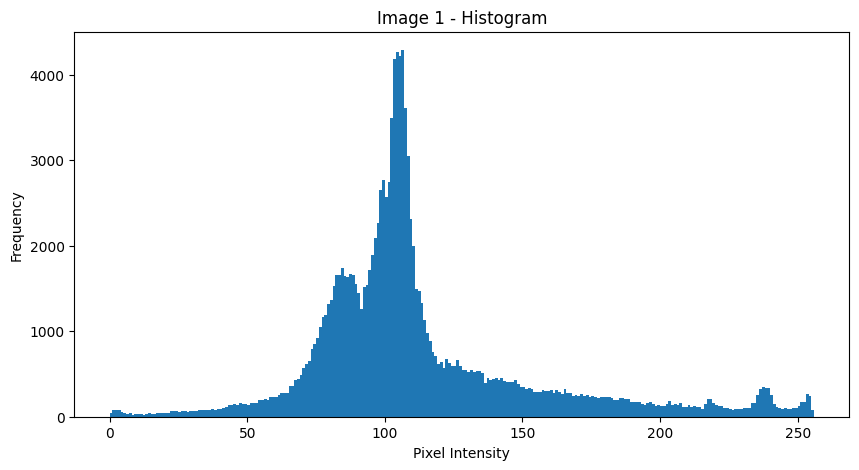

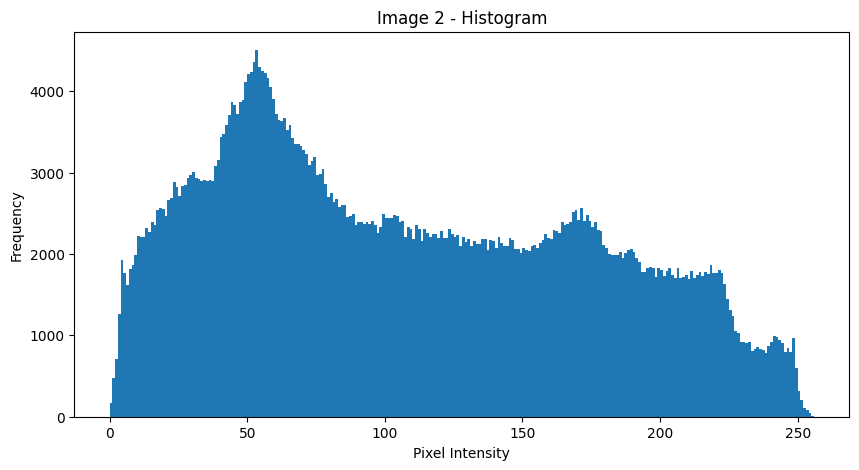

In [ ]:
# 6. Histogram
def compute_and_display_histogram(image, image_title):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(10, 5))
    plt.hist(gray_image.ravel(), 256, [0, 256])
    plt.title(f'{image_title} - Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

compute_and_display_histogram(image1, "Image 1")
compute_and_display_histogram(image2, "Image 2")

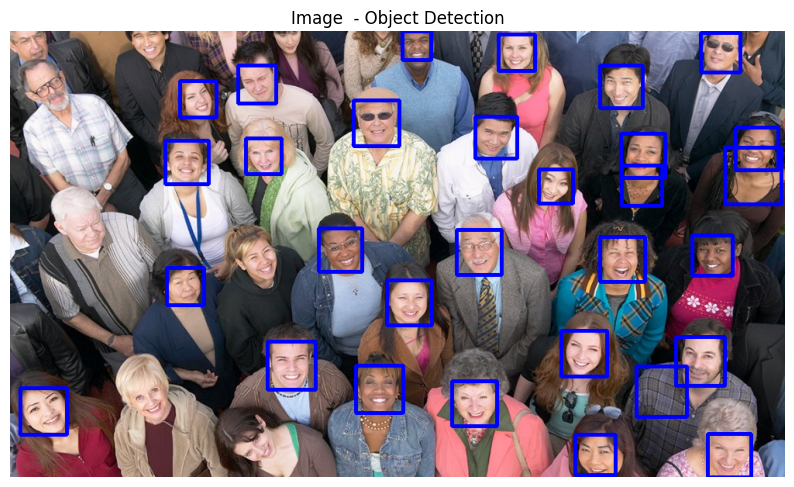

In [ ]:
# 7. Object Detection
def detect_objects(image, image_title):
    # Load pre-trained model (here using Haar Cascade for face detection)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)

    detection_image = image.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(detection_image, (x, y), (x + w, y + h), (255, 0, 0), 3)

    display_image(f'{image_title} - Object Detection', detection_image)

#detect_objects(image1, "Image 1")
detect_objects(image2, "Image ")

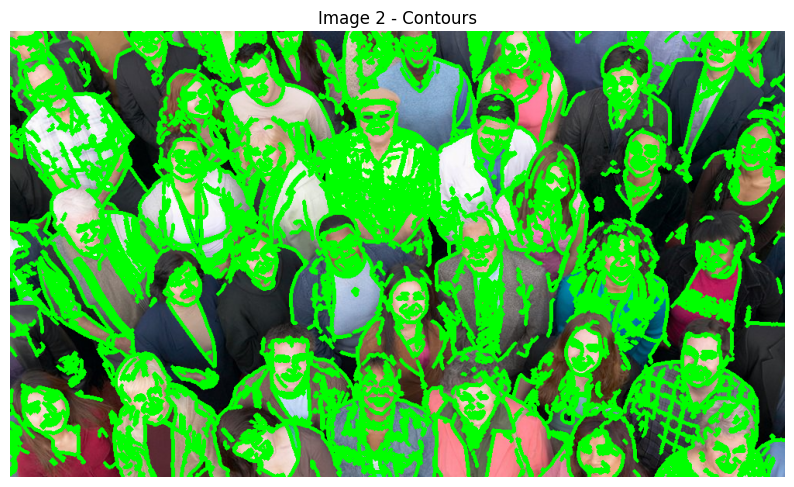

True

In [ ]:
# 8. Save Results
cv2.imwrite('image1_grayscale.jpg', cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY))
cv2.imwrite('image2_grayscale.jpg', cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY))
cv2.imwrite('image1_gaussian_blur.jpg', cv2.GaussianBlur(image1, (15, 15), 0))
cv2.imwrite('image2_gaussian_blur.jpg', cv2.GaussianBlur(image2, (15, 15), 0))
#cv2.imwrite('image1_contours.jpg', find_and_draw_contours(image1.copy(), "Image 1"))
cv2.imwrite('image2_contours.jpg', find_and_draw_contours(image2.copy(), "Image 2"))